In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)

# reading and understanding Data

In [3]:
df=pd.read_csv("recommendation_data.csv",encoding="ISO-8859-9")

C:\Users\ahmet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20,33,73,106,158) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [5]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
len(df.notnull().sum())

181

# deleting the huge empty data

In [8]:
liste=[]
for i in range(181):
    if df.isnull().sum()[i]>1000:
        liste.append(df.notnull().sum().index[i])
for i in liste:
    df.drop(i,axis=1,inplace=True)
        

In [9]:
len(df.notnull().sum())

67

In [10]:
df.head(25)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.0
1,3,John,Smith,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,NaN
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,NaN,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.0
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,James,Anderson,29,USD,19.56,0.0,9.95,29.55,NaN,11|Ground,7.96468E+14,3.0,1.386780e+09,NaN,29.55,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,1

In [11]:
df.drop(["Customers.fname","Orders.lname","Orders.fname","Customers.lname","Customers.fname","Orders.customer_id","Orders.currency","Customers.lname","Orders.customer_id","Orders.fname","Orders.lname","Orders.order_number","Orders.payment_amount","Order_Items.parent","Order_Items.cost","Products.id","Products.name"],axis=1,inplace=True)



In [12]:
df.isnull().sum()

Customers.id                       0
Customers.create_date              0
Customers.last_modified            0
Customers.customer_type          423
Orders.id                          0
Orders.subtotal                    0
Orders.tax                       457
Orders.shipping                  195
Orders.total                       0
Orders.shipping_carrier          617
Orders.shipping_method           443
Orders.tracking                  376
Orders.payment_status              5
Orders.payment_date               18
Orders.payment_type              384
Orders.payment_id                430
Orders.payment_code              748
Orders.status                      0
Orders.placed_date                 0
Orders.updated_date               23
Orders.shipped_date              346
Orders.customer_type             183
Order_Items.id                     0
Order_Items.product_id            43
Order_Items.product_name           0
Order_Items.qty                    0
Order_Items.price                  0
P

In [13]:
df["Orders.id"].nunique()

3565

In [14]:
df["Orders.payment_status"]=df["Orders.payment_status"].fillna("3.0")

# Fitting the model

In [53]:
x=df[["Orders.total","Order_Items.price","Orders.id","Customers.id","Orders.status"]]

In [54]:
x.sort_values("Customers.id",ascending=True,inplace=True)

C:\Users\ahmet\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [55]:
x.head()

,Orders.total,Order_Items.price,Orders.id,Customers.id,Orders.status
1,29.99,5.00,23,3,1
2,78.73,68.78,9531,3,3
3,29.55,19.56,29,4,1
4,46.00,36.05,30,5,1
5,54.41,44.46,226,5,1


In [56]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz

In [57]:
model=model.fit(x)

In [58]:
pred=model.predict(x)

In [59]:
x["cluster"]=pred#tahminlerimizi Datamız koyuyoruz

C:\Users\ahmet\AppData\Local\Temp/ipykernel_17548/3214141912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=pred#tahminlerimizi Datamız koyuyoruz


In [60]:
x.head()#verimizde de artik sınıflandırmayı görebiliyoruz

,Orders.total,Order_Items.price,Orders.id,Customers.id,Orders.status,cluster
1,29.99,5.00,23,3,1,1
2,78.73,68.78,9531,3,3,0
3,29.55,19.56,29,4,1,1
4,46.00,36.05,30,5,1,1
5,54.41,44.46,226,5,1,1


In [61]:
silhouette_score(x,pred)#başarı oranımız

0.5500458946906849

In [62]:
#Acaba kaç gruba ayırsam dah doğru sonuçalırım
def clust(clusters):
    for no_of_cluster in np.arrange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))

In [63]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")#clsutering yaparkenki noktaların merkezini gösteriyor
model.labels_

array([1, 0, 1, ..., 2, 2, 2])

No handles with labels found to put in legend.


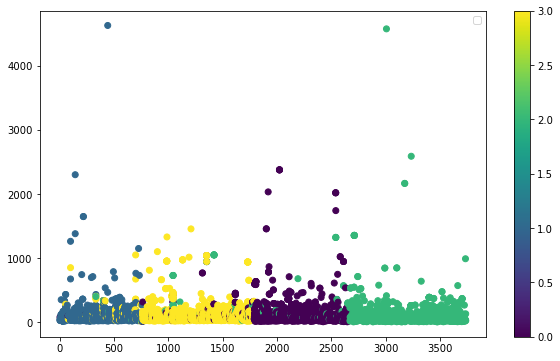

In [71]:
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(x["Customers.id"],x["Orders.total"],c=pred)
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


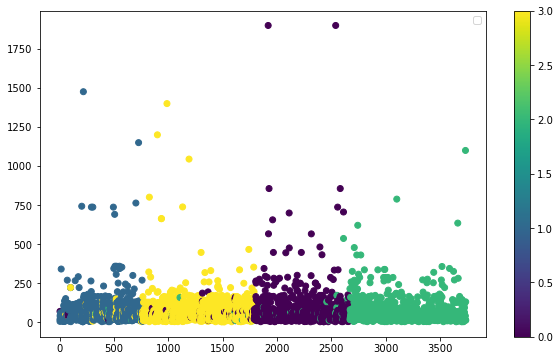

In [73]:
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(x["Customers.id"],x["Order_Items.price"],c=pred)
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


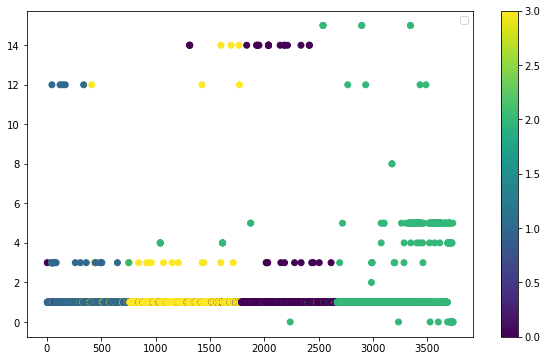

In [72]:
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(x["Customers.id"],x["Orders.status"],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [65]:
#Acaba doğru mu yaptım acaba kaç sınıfa ayırmam lazım dedim
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)#10 sınfa kadar deniyorum acaba hangisi daha iyi

Number of cluster 2,silhouette0.697234689451166
Number of cluster 3,silhouette0.6042286798813314
Number of cluster 4,silhouette0.5523774997351496
Number of cluster 5,silhouette0.5544327089134916
Number of cluster 6,silhouette0.5271926208302062
Number of cluster 7,silhouette0.5173149969693215
Number of cluster 8,silhouette0.48982011111002133
Number of cluster 9,silhouette0.4849696504465729
Number of cluster 10,silhouette0.47631858586555315


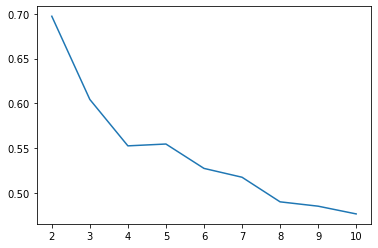

In [66]:
plt.plot(allclusters,allscore)

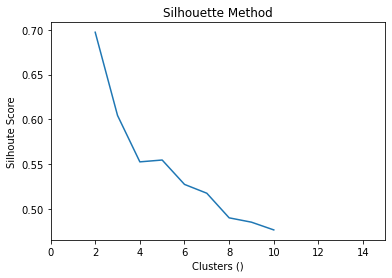

In [67]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(0,15)
plt.show()

In [68]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.697234689451166
Number of cluster 3,silhouette0.6042286798813314
Number of cluster 4,silhouette0.5499842235578135
Number of cluster 5,silhouette0.554604998525054
Number of cluster 6,silhouette0.5271926208302062
Number of cluster 7,silhouette0.5169755084772142
Number of cluster 8,silhouette0.49012557442347815
Number of cluster 9,silhouette0.48429434325117876


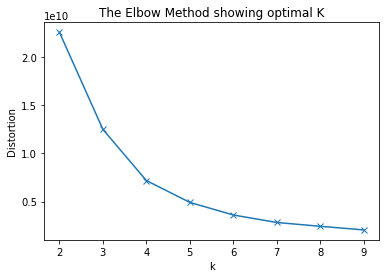

In [69]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 